# Nivell 1
#### Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica. 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Desktop/DataScience/datasets/liga/SP1.csv')
df=df.iloc[:,3:26]
df.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
0,Eibar,Celta,0,0,D,0,0,D,8,6,...,13,3,3,4,4,1,0,2.50,3.25,2.90
1,Granada,Ath Bilbao,2,0,H,0,0,D,4,9,...,10,1,2,3,4,0,0,2.75,3.10,2.75
2,Cadiz,Osasuna,0,2,A,0,1,A,12,6,...,21,6,2,2,2,0,0,2.80,3.00,2.75
3,Alaves,Betis,0,1,A,0,0,D,7,11,...,17,6,4,3,3,0,0,2.80,3.20,2.60
4,Valladolid,Sociedad,1,1,D,1,0,H,8,8,...,17,5,3,4,1,0,0,2.80,3.20,2.60


**Columnas:**
1. Div = League Division
2. Date = Match Date (dd/mm/yy)
3. Time = Time of match kick off<
4. HomeTeam = Home Team
5. AwayTeam = Away Team
6. FTHG = Full Time Home Team Goals
7. FTAG = Full Time Away Team Goals
8. FTR  = Full Time Result (H=Home Win, D=Draw, A=Away Win)
9. HTHG = Half Time Home Team Goals
10. HTAG = Half Time Away Team Goals
11. HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)
12. HS = Home Team Shots
13. AS = Away Team Shots
14. HST = Home Team Shots on Target
15. AST = Away Team Shots on Target
16. HF = Home Team Fouls Committed
17. AF = Away Team Fouls Committed
18. HC = Home Team Corners
19. AC = Away Team Corners
20. HY = Home Team Yellow Cards
21. AY = Away Team Yellow Cards
22. HR = Home Team Red Cards
23. AR = Away Team Red Cards
24. B365H = Bet365 home win odds
25. B365D = Bet365 draw odds
26. B365A = Bet365 away win odds

**Moda**

In [3]:
#moda de HF faltas equipo local
df.HF.value_counts().head()

14    32
12    29
16    27
11    26
13    24
Name: HF, dtype: int64

Vemos que el valor que más se repite es 14 faltas (**moda**) con 32 veces, comprobamos si es correcto

In [4]:
print('Moda: %s faltas y repeticiones %s' %(st.mode(df.HF)[0][0],st.mode(df.HF)[1][0]))

Moda: 14 faltas y repeticiones 32


**Mediana**

In [5]:
lista=np.sort(df.HF.value_counts())
lista

array([ 1,  1,  2,  2,  2,  3,  4,  5,  6,  7,  8, 12, 14, 14, 16, 20, 22,
       23, 24, 26, 27, 29, 32], dtype=int64)

In [6]:
indice=(int(len(lista)/2))
if len(lista)%2:    # si longitud de lista es impar cogemos el valor del medio
    mediana=lista[indice]
else:               # si es par hacemos la media ente los dos valores centrales
    mediana=(lista[indice]+lista[indice+1])/2
print('La mediana es %s faltas'%mediana)

La mediana es 12 faltas


In [7]:
#Comprobación
mediana==np.median(lista)

True

**Desviación estandard**

In [8]:
std=np.sqrt(sum((df.HF-df.HF.mean())**2)/len(df.HF))
print('La desviación estandard es %s faltas'% round(std,2))

La desviación estandard es 4.14 faltas


In [9]:
#Comprobación
std==np.std(df.HF)

True

**Media**

In [10]:
media=df.HF.sum()/len(df.HF)
print('La media es %s faltas'%round(media,2))

La media es 13.46 faltas


In [11]:
#Comprobación
media==np.mean(df.HF)

True

#### Exercici 2:
Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació. 

In [12]:
#HF = Home Team Fouls Committed
#HY = Home Team Yellow Cards
#Vamos a mirar la correlación entre las faltas cometidas y tarjetas amarillas para los equipos de casa
df_correlados=df[['HF','HY']]
df_correlados.corr()

,HF,HY
HF,1.000000,0.385234
HY,0.385234,1.000000


In [13]:
#vamos a crear nuestra propia función
def correlacio(x,y):
    cov=np.mean(x*y)-(np.mean(x)*np.mean(y))
    coefCorr=cov/(np.std(x)*np.std(y))
    return np.round(coefCorr,6)

In [14]:
#son iguales
correlacio(df.HF,df.HY)

0.385234

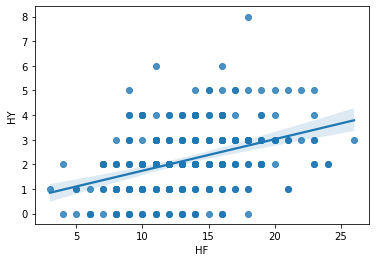

In [15]:
#Podemos hacernos una idea de esta relación mostrando la regresión simple entre las dos variables
sns.regplot(x='HF',y='HY', data=df)
plt.show()

# Nivell 3
#### Exercici 3
Continuant amb les dades de tema esportiu, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.

En situaciones donde los datos son muchos hay riesgo de overflow por lo que podemos aplicar logaritmos a la fórmula de la media geométrica

**Media geométrica**

In [16]:
def media_geo(x):
    y = np.log(x)
    return np.exp(y.mean())

In [17]:
round(media_geo(df.HF),2)

12.78

Comprobamos con el método de scipy.stats que da lo mismo

In [18]:
round(st.gmean(df.HF),2)

12.78

**Media armónica**

In [19]:
media_arm=(1/df.HF).sum()
np.round(len(df.HF)/media_arm,2)

12.01

In [20]:
#Comprobamos que con el método de scipy.stats obtenemos el mismo valor
round(st.hmean(df.HF),2)

12.01